In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import cv2
import os
from tensorflow import keras
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout,GlobalAveragePooling2D
from tensorflow.keras import layers
from keras.utils import to_categorical
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation
import matplotlib.pyplot as plt
# Imports for usint %%timeit cell magic
import time
from PIL import Image, ImageDraw


from DataPrep import DataPrep
dc=DataPrep()


### Load Images

In [2]:
#inputpath='C:/Users/crupa/eyedata/train'
path='E:/School/DDDSystem/images/'
size=80
batchsize=16

In [3]:
# Converting all the images into an array
data = dc.get_data(path,size)

0
Succesful Image Import Count = 500
Succesful Image Import Count = 1000
Succesful Image Import Count = 1500
Succesful Image Import Count = 2000
1
Succesful Image Import Count = 2500
Succesful Image Import Count = 3000
Succesful Image Import Count = 3500
Succesful Image Import Count = 4000


In [4]:
#Read the data in X and y as Features and Labels
X = []
y = []
for feature, label in data:
    X.append(feature)
    y.append(label)

X = np.array(X)

y = np.array(y)



X = X/255.0

# Setting up Train / Test split
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size=test_size, random_state = 24)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3384, 80, 80, 3), (846, 80, 80, 3), (3384,), (846,))

### Ten pictures of Training set

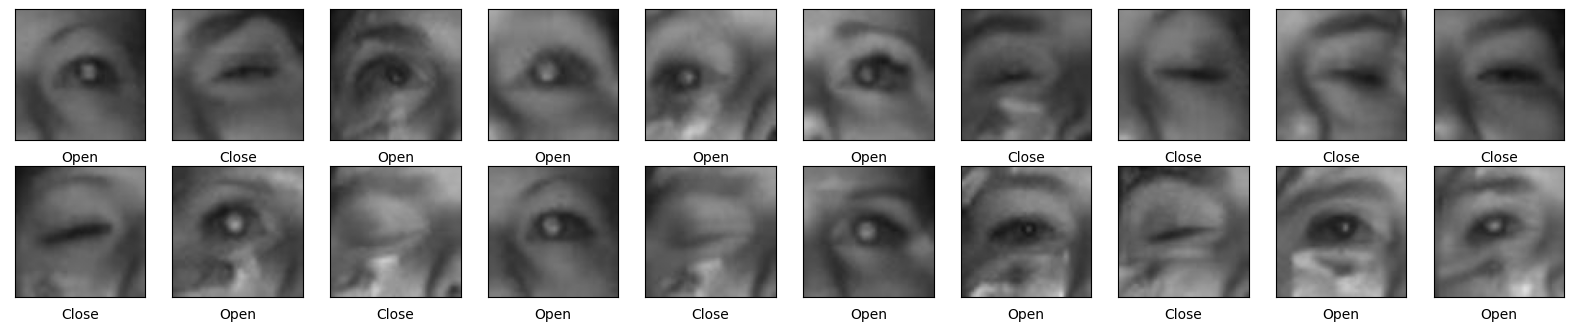

In [5]:
## for the images below
class_names = ['Open','Close']

#Plot ten pictures from the training dataset with corresponding label
plt.figure(figsize = (20,20))
for i in range(20):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[y_train[i]],)

## Build Model

In [6]:
# Instantiate the model
model = Sequential()

# Adding first conv 2d layer
model.add(Conv2D(
                filters = 32, # number of filters
                kernel_size = (3,3), # height/width of filter
                activation = 'relu', # activation function 
                input_shape = (80,80,3) # shape of input (image)
))

# Adding pooling after conv 2d layer
model.add(MaxPooling2D(pool_size = (2,2))) # Dimensions of the region that you are pooling

# Add another convolutional layer.
model.add(Conv2D(
                filters = 32, # number of filters
                kernel_size = (3,3),# height/width of filter
                activation = 'relu'# activation function 
))

model.add(MaxPooling2D(pool_size=(2,2)))

# Add another convolutional layer.
model.add(Conv2D(
                filters = 32, # number of filters
                kernel_size = (3,3),# height/width of filter
                activation = 'relu'# activation function 
))

# Add another pooling layer.
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Adding a dropout layer to avoid overfitting
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))

# Adding a dropout layer to avoid overfitting
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
  
model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x000002028B177640>>

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau


checkpoint = ModelCheckpoint(r'E:/School/DDDSystem/CNN_drozyDATA.h5',monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3 )

callbacks=[checkpoint,earlystop,learning_rate]

In [8]:
model.fit(
    X_train, y_train,
    validation_data=(X_test,y_test),
    epochs=10,
    callbacks=callbacks

)

Epoch 1/10
106/106 [==============================] - ETA: 0s - loss: 0.5439 - accuracy: 0.6950
Epoch 1: val_loss improved from inf to 0.23314, saving model to E:/School/DDDSystem\CNN_drozyDATA.h5
106/106 [==============================] - 17s 146ms/step - loss: 0.5439 - accuracy: 0.6950 - val_loss: 0.2331 - val_accuracy: 0.9113 - lr: 0.0010
Epoch 2/10
106/106 [==============================] - ETA: 0s - loss: 0.2409 - accuracy: 0.9034
Epoch 2: val_loss improved from 0.23314 to 0.17390, saving model to E:/School/DDDSystem\CNN_drozyDATA.h5
106/106 [==============================] - 15s 141ms/step - loss: 0.2409 - accuracy: 0.9034 - val_loss: 0.1739 - val_accuracy: 0.9421 - lr: 0.0010
Epoch 3/10
106/106 [==============================] - ETA: 0s - loss: 0.1784 - accuracy: 0.9320
Epoch 3: val_loss improved from 0.17390 to 0.12209, saving model to E:/School/DDDSystem\CNN_drozyDATA.h5
106/106 [==============================] - 15s 138ms/step - loss: 0.1784 - accuracy: 0.9320 - val_loss: 0.1

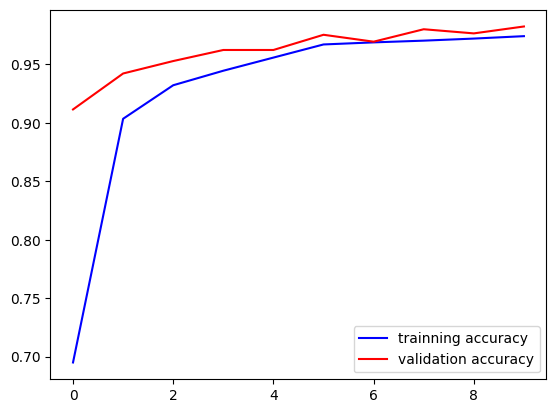

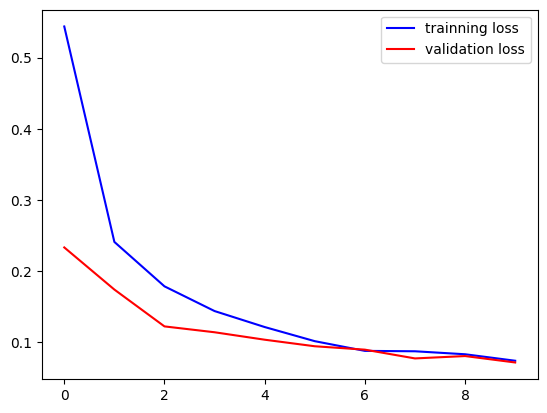

In [9]:
accuracy =model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()


In [10]:
preds = model.predict(X_test)
preds.round(1)
preds

27/27 [==============================] - 1s 39ms/step


array([[9.98326540e-01],
       [1.62239056e-10],
       [3.72646514e-06],
       [9.79942262e-01],
       [9.95993376e-01],
       [9.08530474e-01],
       [1.05519893e-09],
       [9.92136836e-01],
       [1.28814059e-09],
       [4.18271441e-07],
       [1.55178907e-06],
       [9.92684960e-01],
       [6.05215788e-01],
       [1.06474554e-05],
       [3.67651264e-05],
       [5.95192091e-07],
       [1.23148166e-01],
       [9.84618247e-01],
       [9.98943746e-01],
       [7.17732984e-09],
       [6.98156536e-01],
       [3.42357839e-06],
       [9.90390545e-05],
       [9.75891424e-04],
       [1.81351850e-10],
       [9.99744117e-01],
       [4.21630597e-04],
       [9.89192128e-01],
       [1.07938603e-09],
       [1.88368620e-04],
       [9.92919028e-01],
       [2.79499274e-02],
       [9.72469509e-01],
       [3.36872981e-05],
       [9.80948865e-01],
       [3.00168637e-08],
       [8.51791832e-11],
       [9.98500824e-01],
       [9.63697970e-01],
       [1.17862965e-05],


In [11]:

# Evaluate model on test data.
score = model.evaluate(X_test,
                       y_test,
                       verbose=1)

labels = model.metrics_names

# Show model performance.
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

27/27 [==============================] - 1s 40ms/step - loss: 0.0714 - accuracy: 0.9823
loss: 0.07135012745857239
accuracy: 0.9822695255279541


In [12]:
confusion_matrix = tf.math.confusion_matrix(labels=y_test, predictions=preds.round()).numpy()

confusion_matrix


array([[462,  10],
       [  5, 369]])

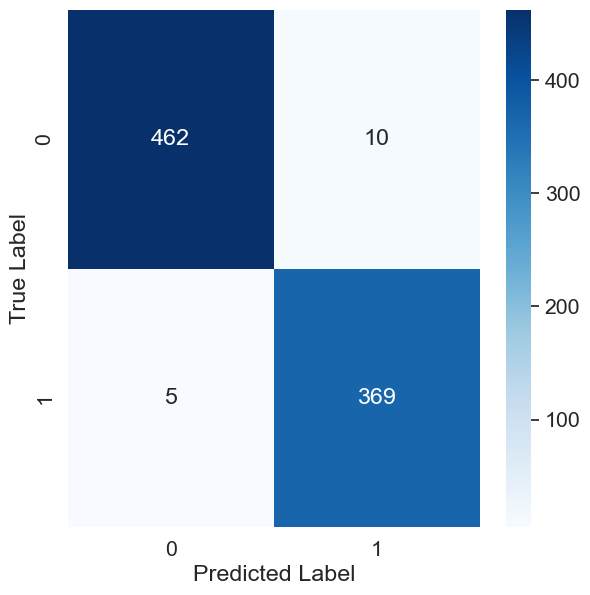

In [13]:
import seaborn as sns

figure = plt.figure(figsize=(6,6))

sns.set(font_scale=1.4)

sns.heatmap(confusion_matrix, annot=True, cmap=plt.cm.Blues, fmt='g')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



In [14]:
tn, fp, fn, tp = confusion_matrix.ravel()

# Calculate the specificity
specificty = tn / (tn + fp)
print(f'specificity: {specificty}')

# Sensitivity
sensitivity = tp / (tp + fn)
print(f'sensitivity / recall: {sensitivity}')

# Accuracy
accuracy = (tn + tp) / (tn + fp + fn + tp)
print(f'accuracy: {accuracy}')

# Precision
precision = tp / (tp + fp)
print(f'precision: {precision}')


specificity: 0.9788135593220338
sensitivity / recall: 0.9866310160427807
accuracy: 0.9822695035460993
precision: 0.9736147757255936
